# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set
import lime_method
import target_parser


# The three models
import decision_tree
import random_forest_method
import svm_method_lime_compatible

In [18]:
import pandas_to_latex

In [19]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

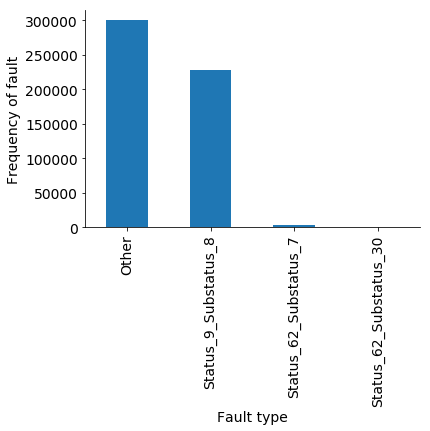

<Figure size 1440x1152 with 0 Axes>

In [20]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [21]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [22]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,10000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,10000,"Status_9_Substatus_8")

In [23]:
print(undersampled_data['Status'].value_counts())

Status_9_Substatus_8      10000
Other                     10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [24]:
'''
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")
'''

'\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")\n'

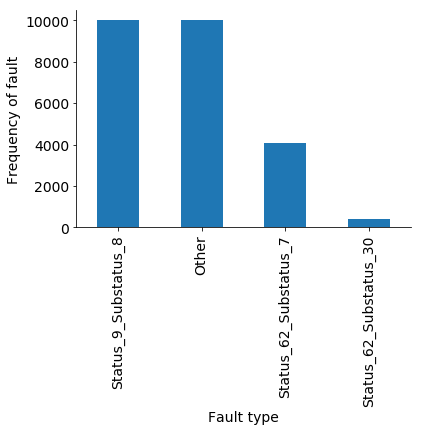

<Figure size 1440x1152 with 0 Axes>

In [25]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [26]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,26-10-2017 17:11:30,-9.100000,9.700000,11.870000,339.0,210.0,10.0,22.0,23.0,15.0,...,65.0,30.0,48.0,8.0,12.0,17.0,26.0,16.020000,202.500000,Status_9_Substatus_8
1,05-08-2019 12:04:30,-13.400001,5.500000,1.480000,343.0,0.0,15.0,25.0,24.0,21.0,...,70.0,37.0,48.0,13.0,18.0,21.0,35.0,7.150000,329.600006,Status_9_Substatus_8
2,22-02-2019 11:27:00,1.700000,9.800000,11.990000,212.0,0.0,14.0,30.0,22.0,19.0,...,69.0,31.0,47.0,10.0,13.0,17.0,28.0,22.959999,213.699997,Status_9_Substatus_8
3,12-09-2019 11:12:30,-14.700000,9.800000,11.270000,226.0,0.0,18.0,30.0,27.0,21.0,...,69.0,34.0,46.0,12.0,17.0,21.0,35.0,21.120001,211.300003,Status_9_Substatus_8
4,16-11-2018 05:12:00,-6.600000,10.400001,19.119999,167.0,1104.0,28.0,54.0,37.0,30.0,...,52.0,39.0,48.0,13.0,26.0,28.0,45.0,6.270000,160.399994,Other


In [27]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(24481,)

In [28]:
y.value_counts()

Status_9_Substatus_8      10000
Other                     10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Translate statues codes to int for easier comparison

In [29]:
y_codes = target_parser.status_to_code(y)
print(np.asarray(np.unique(y_codes, return_counts=True)).T)

[[    0 10000]
 [    1 10000]
 [    2  4098]
 [    3   383]]


## SMOTE (BEFORE RANDOM FOREST)

In [30]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)
print(X.shape)
print(y.shape)
print(X_smote.shape)
print(y_smote.shape)
print(pd.Series(y_smote).value_counts())
'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

(24481, 34)
(24481,)
(40000, 34)
(40000,)
Status_9_Substatus_8      10000
Status_62_Substatus_7     10000
Other                     10000
Status_62_Substatus_30    10000
dtype: int64


'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &        Other &  Status\_62\_Substatus\_30 &  Status\_62\_Substatus\_7 &  Status\_9\_Substatus\_8 \\
\midrule
         Precision &     0.971793 &                0.902685 &               0.985334 &              0.986435 \\
            Recall &     0.976700 &                0.960864 &               0.998780 &              0.973300 \\
          F1-score &     0.972759 &                0.913076 &               0.987991 &              0.983770 \\
           Support &  1000.000000 &               38.300000 &             409.800000 &           1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[9.76700000e-01 3.80000000e-03 6.10000000e-03 1.34000000e-02]
 [3.91644909e-02 9.60835509e-01 0.00000000e+00 0.00000000e+00]
 [1.22010737e-03 0.00000000e+00 9.98779893e-01 0.00000000e+00]
 [2.64000000e-02 3.00000000e-04 0.00000000e+00 9.73300000e-01]]


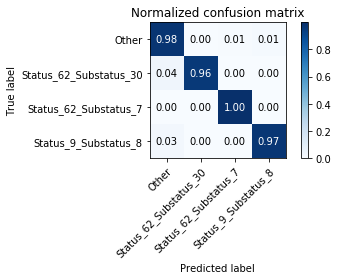

In [31]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Smote is on the cross validation
df_rf, y_true, y_pred = performance_measure.cross_validate_model(rf,X,y,smote=True)
performance_measure.confusion_matrix(y_true,y_pred)

# rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
# rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

# Combine training and test data for cross validation:

rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
#feature_importances.head()
#performance_measure.confusion_matrix(y_true,y_pred,normalize=True)
performance_measure.plot_confusion_matrix(y_true,y_pred,normalize=True)

In [32]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.083803 \\
   0.077319 \\
   0.057656 \\
   0.053413 \\
   0.053355 \\
\bottomrule
\end{tabular}



## SVM

### Split data for LIME

In [33]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Status_9_Substatus_8      3300
Other                     3300
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

### Translate y status codes to ints for lime compatibility

In [34]:
y_train_codes = target_parser.status_to_code(y_train)
y_test_codes  = target_parser.status_to_code(y_test)

print('Counted y_train_codes:')
print(np.asarray(np.unique(y_train_codes, return_counts=True)).T)
print('\nCounted y_test_codes:')
print(np.asarray(np.unique(y_test_codes, return_counts=True)).T)


Counted y_train_codes:
[[   0 6700]
 [   1 6700]
 [   2 2746]
 [   3  256]]

Counted y_test_codes:
[[   0 3300]
 [   1 3300]
 [   2 1352]
 [   3  127]]


### Scale data set for SVM

In [35]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole_smote.fit_transform(X_smote)
print(X_scaled_oversampled.shape)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_for_data)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_for_data)
X_train_scaled.head()

(40000, 34)
(16402, 34)
(8079, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.519825,0.191257,0.616751,0.300836,0.185185,0.592105,0.729412,0.7250,0.588235,0.583333,...,0.645161,0.738095,0.600000,0.500000,0.489796,0.530120,0.40,0.417476,0.000000,0.491827
1,0.530321,0.109290,0.406937,0.860724,0.042031,0.618421,0.623529,0.6875,0.600000,0.607143,...,0.602151,0.619048,0.633333,0.404255,0.428571,0.481928,0.28,0.262136,0.000000,0.909890
2,0.506414,0.327869,0.110829,0.969359,0.000000,0.565789,0.564706,0.6250,0.552941,0.559524,...,0.150538,0.154762,0.400000,0.063830,0.265306,0.433735,0.24,0.456311,0.636628,0.972824
3,0.499125,0.273224,0.813875,0.270195,0.622139,0.618421,0.635294,0.6875,0.388235,0.428571,...,0.258065,0.190476,0.133333,0.170213,0.224490,0.506024,0.28,0.504854,0.000000,0.454843
4,0.511370,0.377049,0.877750,0.768802,0.981273,0.644737,0.788235,0.7750,0.482353,0.523810,...,0.688172,0.714286,0.366667,0.361702,0.448980,0.686747,0.60,0.660194,0.016277,0.829179


In [36]:
print(y.shape)
print(X_smote.shape)
print(X_scaled_oversampled.shape)
print(y_smote.shape)

(24481,)
(40000, 34)
(40000, 34)
(40000,)


In [37]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.191257 &    0.616751 &          0.300836 &     0.185185 &             0.592105 &  ... \\
  0.109290 &    0.406937 &          0.860724 &     0.042031 &             0.618421 &  ... \\
  0.327869 &    0.110829 &          0.969359 &     0.000000 &             0.565789 &  ... \\
  0.273224 &    0.813875 &          0.270195 &     0.622139 &             0.618421 &  ... \\
  0.377049 &    0.877750 &          0.768802 &     0.981273 &             0.644737 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)
X_train_scaled_smote = pd.DataFrame(X_train_scaled_smote, columns=columns_for_data)


In [39]:
X_train_scaled_smote

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.519825,0.191257,0.616751,0.300836,0.185185,0.592105,0.729412,0.725000,0.588235,0.583333,...,0.645161,0.738095,0.600000,0.500000,0.489796,0.530120,0.400000,0.417476,0.000000,0.491827
1,0.530321,0.109290,0.406937,0.860724,0.042031,0.618421,0.623529,0.687500,0.600000,0.607143,...,0.602151,0.619048,0.633333,0.404255,0.428571,0.481928,0.280000,0.262136,0.000000,0.909890
2,0.506414,0.327869,0.110829,0.969359,0.000000,0.565789,0.564706,0.625000,0.552941,0.559524,...,0.150538,0.154762,0.400000,0.063830,0.265306,0.433735,0.240000,0.456311,0.636628,0.972824
3,0.499125,0.273224,0.813875,0.270195,0.622139,0.618421,0.635294,0.687500,0.388235,0.428571,...,0.258065,0.190476,0.133333,0.170213,0.224490,0.506024,0.280000,0.504854,0.000000,0.454843
4,0.511370,0.377049,0.877750,0.768802,0.981273,0.644737,0.788235,0.775000,0.482353,0.523810,...,0.688172,0.714286,0.366667,0.361702,0.448980,0.686747,0.600000,0.660194,0.016277,0.829179
5,0.497668,0.169399,0.511421,0.311978,0.000000,0.539474,0.635294,0.562500,0.482353,0.500000,...,0.860215,0.892857,0.500000,0.468085,0.183673,0.337349,0.380000,0.194175,0.111997,0.484471
6,0.479009,0.254098,0.775381,0.654596,0.351644,0.697368,0.858824,0.675000,0.482353,0.500000,...,0.430108,0.750000,0.400000,0.489362,0.448980,0.614458,0.480000,0.582524,0.000000,0.722722
7,0.499708,0.155738,0.517767,0.690808,0.104037,0.578947,0.588235,0.675000,0.552941,0.571429,...,0.688172,0.761905,0.600000,0.468085,0.387755,0.445783,0.220000,0.242718,0.049801,0.763792
8,0.511079,0.150273,0.489002,0.924791,0.084062,0.500000,0.588235,0.612500,0.529412,0.547619,...,0.677419,0.738095,0.533333,0.351064,0.387755,0.518072,0.360000,0.359223,0.000000,0.943400
9,0.367055,0.005464,0.000000,0.362117,0.000000,0.421053,0.482353,0.500000,0.494118,0.488095,...,0.161290,0.166667,0.450000,0.138298,0.244898,0.385542,0.160000,0.213592,0.636197,0.429710


### Translate y status codes to ints for lime compatibility

In [40]:
y_train_smote_codes = target_parser.status_to_code(y_train_smote)
print(np.asarray(np.unique(y_train_smote_codes, return_counts=True)).T)

[[   0 6700]
 [   1 6700]
 [   2 6700]
 [   3 6700]]


## SVM method

In [41]:
from sklearn.svm import SVC

### BALANCED SVM

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &        Other &  Status\_62\_Substatus\_30 &  Status\_62\_Substatus\_7 &  Status\_9\_Substatus\_8 \\
\midrule
         Precision &     0.747461 &                0.038067 &               0.692005 &              0.759691 \\
            Recall &     0.364600 &                0.600945 &               0.851395 &              0.646300 \\
          F1-score &     0.617446 &                0.046841 &               0.718832 &              0.733821 \\
           Support &  1000.000000 &               38.300000 &             409.800000 &           1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.3646     0.3192     0.1393     0.1769    ]
 [0.14882507 0.60052219 0.09138381 0.15926893]
 [0.02318204 0.07247438 0.85139092 0.05295266]
 [0.1078     0.2331     0.0128     0.6463    ]]


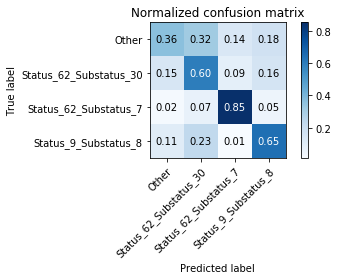

Total Accuracy 		0.565

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.748 		 0.365 		 0.490
Status_62_Substatus_30    	 0.038 		 0.601 		 0.072
Status_62_Substatus_7     	 0.692 		 0.851 		 0.763
Status_9_Substatus_8      	 0.759 		 0.646 		 0.698


In [42]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced = performance_measure.cross_validate_model(svm_balanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True)
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_balanced, y_pred_svm_balanced)
# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &        Other &  Status\_62\_Substatus\_30 &  Status\_62\_Substatus\_7 &  Status\_9\_Substatus\_8 \\
\midrule
         Precision &     0.657806 &                     0.0 &               0.801029 &              0.759912 \\
            Recall &     0.735000 &                     0.0 &               0.714255 &              0.732800 \\
          F1-score &     0.671789 &                     0.0 &               0.781966 &              0.754130 \\
           Support &  1000.000000 &                    38.3 &             409.800000 &           1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.735      0.         0.0623     0.2027    ]
 [0.73368146 0.         0.08616188 0.18015666]
 [0.23133236 0.         0.71425085 0.05441679]
 [0.26       0.         0.0072     0.7328    ]]


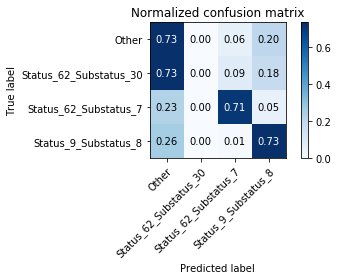

Total Accuracy 		0.719

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.657 		 0.735 		 0.694
Status_62_Substatus_30    	 0.000 		 0.000 		 0.000
Status_62_Substatus_7     	 0.801 		 0.714 		 0.755
Status_9_Substatus_8      	 0.760 		 0.733 		 0.746


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,normalize=True)
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_unbalanced, y_pred_svm_unbalanced)
# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &        Other &  Status\_62\_Substatus\_30 &  Status\_62\_Substatus\_7 &  Status\_9\_Substatus\_8 \\
\midrule
         Precision &     0.763175 &                0.041567 &               0.731416 &              0.817168 \\
            Recall &     0.426800 &                0.671457 &               0.910691 &              0.620400 \\
          F1-score &     0.659020 &                0.051166 &               0.761338 &              0.768285 \\
           Support &  1000.000000 &               38.300000 &             409.800000 &           1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.4268     0.3368     0.1215     0.1149    ]
 [0.18015666 0.67101828 0.08616188 0.06266319]
 [0.02781845 0.00854075 0.91068814 0.05295266]
 [0.114      0.2532     0.0124     0.6204    ]]


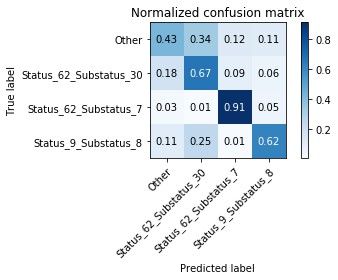

Total Accuracy 		0.591

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.763 		 0.427 		 0.547
Status_62_Substatus_30    	 0.042 		 0.671 		 0.078
Status_62_Substatus_7     	 0.731 		 0.911 		 0.811
Status_9_Substatus_8      	 0.817 		 0.620 		 0.705


In [44]:
svm_unbalanced_smote = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True)
performance_measure.get_performance_measures(y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote)
# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [45]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())


(26800, 34)
(16402,)
(8079,)
Status_9_Substatus_8      10000
Other                     10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &        Other &  Status\_62\_Substatus\_30 &  Status\_62\_Substatus\_7 &  Status\_9\_Substatus\_8 \\
\midrule
         Precision &     0.763175 &                0.041567 &               0.731416 &              0.817168 \\
            Recall &     0.426800 &                0.671457 &               0.910691 &              0.620400 \\
          F1-score &     0.659020 &                0.051166 &               0.761338 &              0.768285 \\
           Support &  1000.000000 &               38.300000 &             409.800000 &           1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.4268     0.3368     0.1215     0.1149    ]
 [0.18015666 0.67101828 0.08616188 0.06266319]
 [0.02781845 0.00854075 0.91068814 0.05295266]
 [0.114      0.2532     0.0124     0.6204    ]]


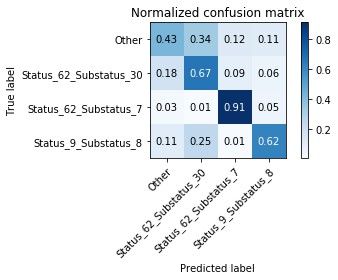

Total Accuracy 		0.591

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.763 		 0.427 		 0.547
Status_62_Substatus_30    	 0.042 		 0.671 		 0.078
Status_62_Substatus_7     	 0.731 		 0.911 		 0.811
Status_9_Substatus_8      	 0.817 		 0.620 		 0.705


In [46]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True)
performance_measure.get_performance_measures(y_true_svm_balanced_smote, y_pred_svm_balanced_smote)
# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and probability

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.42363636 0.17636364 0.13424242 0.26575758]
 [0.12212121 0.66363636 0.01272727 0.20151515]
 [0.02884615 0.05621302 0.8683432  0.04659763]
 [0.18897638 0.17322835 0.11811024 0.51968504]]


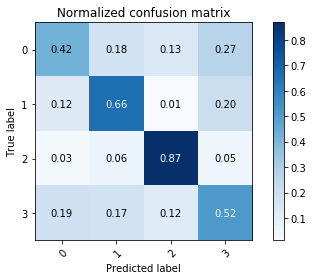

Plotting Performance Measure...
Total Accuracy 		0.598

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.750 		 0.424 		 0.541
1                         	 0.763 		 0.664 		 0.710
2                         	 0.701 		 0.868 		 0.776
3                         	 0.039 		 0.520 		 0.073


In [47]:
svm_prob_smote = svm_method_lime_compatible.get_svm_model_balanced_with_prob(X_train_scaled_smote, 
                                                                             X_test_scaled, 
                                                                             y_train_smote_codes, 
                                                                             y_test_codes)

#### Run Lime Metod on 

In [48]:
svm_prob_smote.classes_

array([0, 1, 2, 3])

In [49]:
targetNames = svm_prob_smote.classes_
explainer = lime_method.run_lime(X_train_scaled_smote, targetNames)
exp_instance = lime_method.explain_instance(X_test_scaled, svm_prob_smote, explainer, 2)
exp_instance.show_in_notebook(show_table=True) #, show_all=True)

## Decision tree model

### Remove the features from the random forest model called rf


In [50]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

,Selected features for decision tree
0,Log-T-Raw-TransformerTemperature
1,Log-T-Raw-Rectifier1HeatSink
2,Log-T-Raw-Rotor1Temperature
3,Log-T-Raw-Stator1Temperature
4,Log-T-Raw-Rotor2Temperature
5,ActivePower


### Convert the selected DT variables to LATEX

In [51]:
# Print to latex
pandas_to_latex.df_to_latex(df_selected_features)


\begin{tabular}{l}
\toprule
Selected features for decision tree \\
\midrule
   Log-T-Raw-TransformerTemperature \\
       Log-T-Raw-Rectifier1HeatSink \\
        Log-T-Raw-Rotor1Temperature \\
       Log-T-Raw-Stator1Temperature \\
        Log-T-Raw-Rotor2Temperature \\
                        ActivePower \\
\bottomrule
\end{tabular}



In [52]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

['', 'TransformerTemperature']
['', 'Rectifier1HeatSink']
['', 'Rotor1Temperature']
['', 'Stator1Temperature']
['', 'Rotor2Temperature']
['ActivePower']


['TransformerTemperature',
 'Rectifier1HeatSink',
 'Rotor1Temperature',
 'Stator1Temperature',
 'Rotor2Temperature',
 'ActivePower']

### Evaluate Decision tree model

#### Setting depth for tree


In [53]:
from sklearn.tree import DecisionTreeClassifier
DEPTH = 3

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &        Other &  Status\_62\_Substatus\_30 &  Status\_62\_Substatus\_7 &  Status\_9\_Substatus\_8 \\
\midrule
         Precision &     0.765994 &                0.032491 &               0.832012 &              0.930192 \\
            Recall &     0.519400 &                0.700202 &               0.788439 &              0.515700 \\
          F1-score &     0.699347 &                0.040148 &               0.822848 &              0.801256 \\
           Support &  1000.000000 &               38.300000 &             409.800000 &           1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.5194     0.4079     0.0555     0.0172    ]
 [0.26109661 0.6997389  0.02349869 0.0156658 ]
 [0.15714983 0.0034163  0.78843338 0.05100049]
 [0.0843     0.3911     0.0089     0.5157    ]]


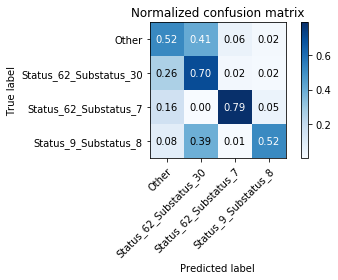

In [54]:
X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)

df_dt, y_true_dt, y_pred_dt = performance_measure.cross_validate_model(clf_df,X_dt,y,smote=True)
performance_measure.plot_confusion_matrix(y_true_dt,y_pred_dt,normalize=True)


In [55]:
import numpy as np

# Training the DT with the SMOTE data (all of it)

X_smote_with_names = (pd.DataFrame(X_smote))
X_smote_with_names.columns = columns_for_data


# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_smote_filtered = X_smote_with_names[include_features.tolist()]

# Printing df
X_smote_filtered.head()

,Log-T-Raw-TransformerTemperature,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rotor1Temperature,Log-T-Raw-Stator1Temperature,Log-T-Raw-Rotor2Temperature,ActivePower
0,26.0,67.0,25.0,36.0,26.0,210.0
1,35.0,70.0,28.0,32.0,28.0,0.0
2,28.0,67.0,33.0,48.0,34.0,0.0
3,35.0,70.0,34.0,50.0,35.0,0.0
4,45.0,55.0,62.0,70.0,63.0,1104.0


In [56]:
col_rename_dict = {i:j for i,j in zip(X_smote_filtered.columns,shorter_feature_names)}
X_smote_filtered.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_smote_filtered.head()

/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,TransformerTemperature,Rectifier1HeatSink,Rotor1Temperature,Stator1Temperature,Rotor2Temperature,ActivePower
0,26.0,67.0,25.0,36.0,26.0,210.0
1,35.0,70.0,28.0,32.0,28.0,0.0
2,28.0,67.0,33.0,48.0,34.0,0.0
3,35.0,70.0,34.0,50.0,35.0,0.0
4,45.0,55.0,62.0,70.0,63.0,1104.0


### Training the DT

In [57]:
# Train DT on these features and print it out:

clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)
clf_df.fit(X_smote_filtered,y_smote)


# dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
# dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [58]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_smote_filtered.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [59]:
save_tree(clf_df,"depth3")
# save_tree(dt_depth3,"depth3")